# Training notebook
In this notebook, Pytorch library is exploited for training different models for data classification. Since images have 4 channels, RGB-D formatted, conventional pretrained models cannot be easily exploited, so instead of transferring learning, they are retrained from scratch. Models found in this notebook are:
- Softmax Regression
- LeNet

## Dataset
Dataset is managed by `utils.HandDataset`, a class that subclasses `torch.utils.data.Dataset` and thus can be used to feed an iterator `torch.utils.data.DataLoader`.

8370 samples of shape (28, 28, 4)
1440 samples of shape (28, 28, 4)

Sample: 2117
Label: ok


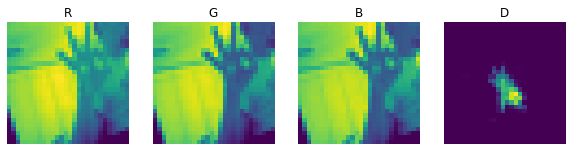

In [1]:
import numpy as np
import pathlib
import torch
from torch import nn

import utils

DATA_PATH = pathlib.Path('../data')

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# dataset filenames
train = utils.HandDataset(DATA_PATH/'training_set.mat')
valid = utils.HandDataset(DATA_PATH/'validation_set.mat')

print(train)
print(valid)

train.show_sample()

# dataset iterators
batch_size = 256
train_iter = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
valid_iter = torch.utils.data.DataLoader(valid, batch_size=batch_size, shuffle=False)


## Softmax regression

In [2]:
net = utils.SoftmaxRegression(n_inputs=np.prod(train.sample_shape), n_outputs=len(train.classes))
loss_function = nn.CrossEntropyLoss()
n_epochs, lr = 10, 0.05
optimizer = torch.optim.SGD(net.parameters(), lr=lr, momentum=0.5)

In [3]:
print(f"Training on device: {device}")
net.to(device)

train_metric = utils.Accumulator(3)  # num. samples; running loss; correct predictions.
valid_metric = utils.Accumulator(2)  # num. samples; correct predictions.

for epoch in range(n_epochs):  # cycle on epochs

    # training
    net.train()
    train_metric.reset()
    valid_metric.reset()

    for batch, (X, y) in enumerate(train_iter):  # cycle on mini-batches

        # move data to GPU if available
        X.to(device)
        y.to(device)

        # reset the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        y_hat = net(X)
        loss = loss_function(y_hat, y)
        loss.backward()
        optimizer.step()

        # accumulate batch statistics
        train_metric.add(
            y.size().numel(),
            loss.item(),
            utils.accuracy(y_hat, y)
        )

    # validation
    net.eval()

    for X, y in valid_iter:  # cycle on mini-batches

        # forward
        y_hat = net(X)
        
        # accumulate batch statistics
        valid_metric.add(
            y.size().numel(),
            utils.accuracy(y_hat, y)
        )
    
    # print epoch statistics
    print(f"epoch:{epoch:5}\tloss:{train_metric[1]/train_metric[0]:.3}\taccuracy:{train_metric[2]/train_metric[0]:.3}\tval-accuracy:{valid_metric[1]/valid_metric[0]:.3}")

Training on device: cpu
epoch:    0	loss:0.0208	accuracy:0.381	val-accuracy:0.411
epoch:    1	loss:0.0133	accuracy:0.479	val-accuracy:0.481
epoch:    2	loss:0.0105	accuracy:0.525	val-accuracy:0.556
epoch:    3	loss:0.0026	accuracy:0.76	val-accuracy:0.706
epoch:    4	loss:0.00219	accuracy:0.778	val-accuracy:0.664
epoch:    5	loss:0.00724	accuracy:0.61	val-accuracy:0.581
epoch:    6	loss:0.00405	accuracy:0.733	val-accuracy:0.697
epoch:    7	loss:0.00129	accuracy:0.871	val-accuracy:0.769
epoch:    8	loss:0.00125	accuracy:0.88	val-accuracy:0.754
epoch:    9	loss:0.00141	accuracy:0.854	val-accuracy:0.775


## LeNet-5

In [4]:
net = utils.LeNet()
net

Conv2d output shape: 	 torch.Size([1, 6, 28, 28])
Sigmoid output shape: 	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape: 	 torch.Size([1, 6, 14, 14])
Conv2d output shape: 	 torch.Size([1, 16, 10, 10])
Sigmoid output shape: 	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape: 	 torch.Size([1, 16, 5, 5])
Flatten output shape: 	 torch.Size([1, 400])
Linear output shape: 	 torch.Size([1, 120])
Sigmoid output shape: 	 torch.Size([1, 120])
Linear output shape: 	 torch.Size([1, 84])
Sigmoid output shape: 	 torch.Size([1, 84])
Linear output shape: 	 torch.Size([1, 3])


In [5]:
print(f"Training on device: {device}")
net.to(device)

train_metric = utils.Accumulator(3)  # num. samples; running loss; correct predictions.
valid_metric = utils.Accumulator(2)  # num. samples; correct predictions.

for epoch in range(n_epochs):  # cycle on epochs

    # training
    net.train()
    train_metric.reset()
    valid_metric.reset()

    for batch, (X, y) in enumerate(train_iter):  # cycle on mini-batches

        # move data to GPU if available
        X.to(device)
        y.to(device)

        # reset the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        y_hat = net(X)
        loss = loss_function(y_hat, y)
        loss.backward()
        optimizer.step()

        # accumulate batch statistics
        train_metric.add(
            y.size().numel(),
            loss.item(),
            utils.accuracy(y_hat, y)
        )

    # validation
    net.eval()

    for X, y in valid_iter:  # cycle on mini-batches

        # forward
        y_hat = net(X)
        
        # accumulate batch statistics
        valid_metric.add(
            y.size().numel(),
            utils.accuracy(y_hat, y)
        )
    
    # print epoch statistics
    print(f"epoch:{epoch:5}\tloss:{train_metric[1]/train_metric[0]:.3}\taccuracy:{train_metric[2]/train_metric[0]:.3}\tval-accuracy:{valid_metric[1]/valid_metric[0]:.3}")

Training on device: cpu
epoch:    0	loss:0.00449	accuracy:0.333	val-accuracy:0.333
epoch:    1	loss:0.00449	accuracy:0.333	val-accuracy:0.333
epoch:    2	loss:0.00449	accuracy:0.333	val-accuracy:0.333
epoch:    3	loss:0.00449	accuracy:0.333	val-accuracy:0.333
epoch:    4	loss:0.00449	accuracy:0.333	val-accuracy:0.333
epoch:    5	loss:0.00449	accuracy:0.333	val-accuracy:0.333
epoch:    6	loss:0.00449	accuracy:0.333	val-accuracy:0.333
epoch:    7	loss:0.00448	accuracy:0.333	val-accuracy:0.333
epoch:    8	loss:0.00449	accuracy:0.333	val-accuracy:0.333
epoch:    9	loss:0.00449	accuracy:0.333	val-accuracy:0.333


# Test on test set


Sample: 6
Label: fist


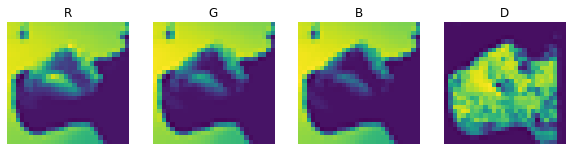

In [6]:
test = utils.HandDataset(DATA_PATH/'test_set.mat')
test.show_sample()
test_iter = torch.utils.data.DataLoader(test, batch_size=len(test), shuffle=False)

In [7]:
net.eval()
for X, y in test_iter:
    y_hat = net(X)

print(f"Accuracy: {utils.accuracy(y_hat, y) / len(test):.3}")
print(y)
print(y_hat)


Accuracy: 0.444
tensor([0, 0, 0, 0, 1, 1, 1, 2, 2])
tensor([[ 0.4550, -0.1814, -0.0488],
        [ 0.4550, -0.1814, -0.0488],
        [ 0.4550, -0.1814, -0.0488],
        [ 0.4550, -0.1814, -0.0488],
        [ 0.4550, -0.1814, -0.0488],
        [ 0.4550, -0.1814, -0.0488],
        [ 0.4550, -0.1815, -0.0488],
        [ 0.4551, -0.1814, -0.0488],
        [ 0.4550, -0.1814, -0.0487]], grad_fn=<AddmmBackward>)
